# Ames house prices kaggle competition

This is data analysis prepared for Kaggle [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques#) competition analysing and predicting prices of residential homes in [Ames, Iowa](https://en.wikipedia.org/wiki/Ames,_Iowa).

The main steps of the analysis process we will conduct are:
1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data
4. Prepare the data for machine learning algorithms
5. Select a model and train it
6. Fine-tune the model
7. Present solution


## 1. Frame the problem and look at the big picture

This competition objective is to predict the sales price of each home base on the set of features values. For Id in the test set, we must predict the value of the `SalePrice` variable.

This is clearly supervised learning problem since we are dealing with labeled training data. And because we try to predict variable value based on other set of feature it is clearly a regression problem.

The proposed solution will be evaluated on Root-Mean-Squared-Error (RMSE) the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

The final submission should have the following format:

`Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.`


## 2. Get the data

We will be using The Ames Housing dataset which was compiled by Dean De Cock for use in data science education. It contains 79 explanatory variables describing aspects of residential homes in Ames, Iowa, USA.

The data set was downloaded from Kaggle competition site and saved in this analysis `datasets` folder. Data is already divided into test and train data sets. We will use train data set to build our model and test to evaluate it later on.

First let's have a quick look at data set description where we can find all variables exmplanation to better understand what each variable means.

In [16]:
!cat datasets/data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

We see all feature described fully here. We can see that there are several features for which `NA` does not mean that the data was not callected but rather lack of presence (e.g. `NA` in `PoolQC` variable means that there is no pool at the property which is a valuable information rather than just missing data). There are also properties represented by several columns if there are multiple types of values needed for one property (e.g. `Exterior1st` and `Exterior2nd` both represent exterior covering on house but the second is not empty only if more than one material is used in the property). We talk here about categorical features. We will take of these problems later.

Let's now load the data and have a close look at it.

In [10]:
import pandas as pd

housing = pd.read_csv("datasets/train.csv")

We'll first see first few data records to check how it looks like.

In [11]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We can see that data set contains large number of features for each data record. The last one is `SalePrice` which is our target value - the one we will try to predict.

Next let's get more overall data set information.

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We can see that we have lot's of feature here! Around half of them are of `object` type and since we loaded them from csv file we assume they are text. This means that we will deal with lots of categorical data features. Of course features like `Street` has to be treated as category rather than a number value. On the other hand all area related fields will be numerical. We will have to take care of the categorical values before feeding them into machine learning algorithms.

What is also clear here is that we have 1460 data records in our training set. Not that much in terms of training data model, but probably enough because of reach features number. Some of the features however have less (sometimes much less) values recorded which means we will also deal with missing values here. There are several strategies to deal with that based on the models solution we will arrive at and we will deal with this problem also before feeding the data to out models. Doing that we also need to remember about what we found studying data decription - some missing values are actually meaningful (again: some of them not all). Like in case of `PoolQC` variable: among all 1460 properties only 7 had swimming pools and the rest with `NaN` simply did not. Definitelly not a pool area.

Let's now see the overall numerical features distribution properties.

In [14]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Here we can see the numerical features only. It is still plenty of them describing each data record. All right almost each: `LotFrontage`, `MasVnrArea`, `GarageYrBlt` have some missing data but besides that the numerical variables are collected rather fully which makes our analysis promising. 

## 3. Explore the data

Taking into account our data complexity - especially features number - we will not be able to predict anything manually. Or at least it will be difficult. But we can perform some basic exploratory analysis to see how the data behaves in general sense, what are main tendencies or what are the relations between variables espcially with the relation to our target value. Let's do it now.

Let's start by creating the training data copy for exploration to prevent any accidental data modifications.

In [18]:
housing_copy = housing.copy()

First we will look at numerical variables distributions.

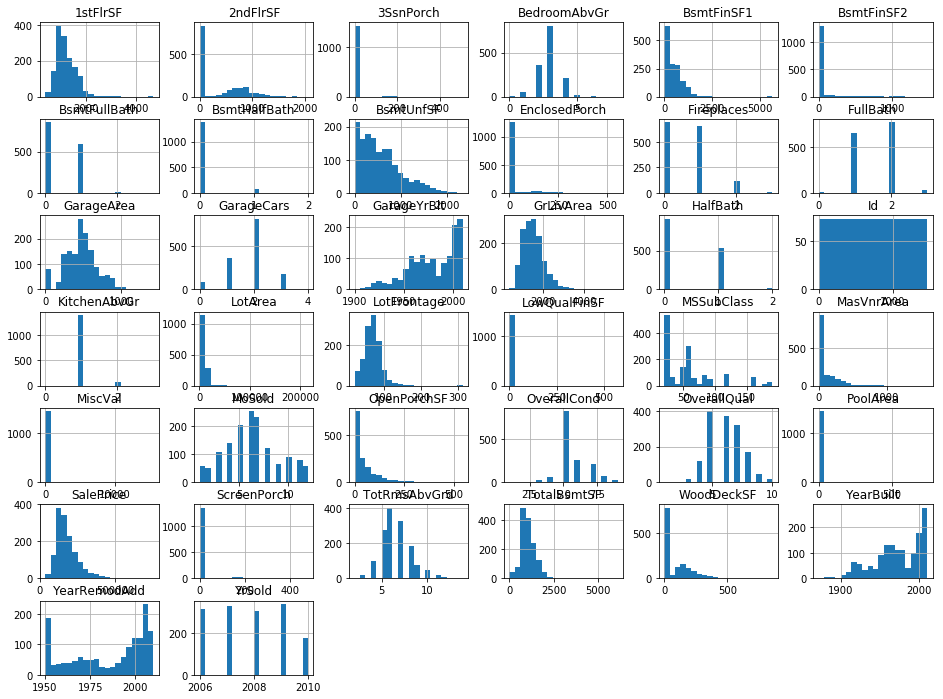

In [31]:
%matplotlib inline

housing_copy.hist(bins=20, figsize=(16, 12));

We have now very general sense of what each numerical variable distribution looks like. Let's have a closer look at some of them. 

We will start with target feature `SalePrice` - our target value.

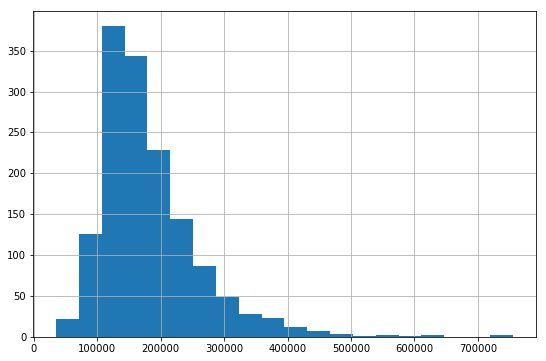

In [35]:
housing_copy["SalePrice"].hist(bins=20, figsize=(9, 6))

We can clearly see that the `SalePrice` variable has positively skewed distribution meaning that there is a lot of cheaper properties and a few expesive ones. Let's look more closely at `SalePrice` distribution properties.

In [37]:
housing_copy["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

So for our target value with have obviously 1460 data records - one for each transaction recorded in the data set. The mean price of properties sold was \$180921 with a standard deviation of \$79442. Since distribution is skewed median will be central tendecy mesure, with a value of \$163000. We have quite long positive tail in the distribution - the maximum value is \$755000. This is large above the average. Positive thing we can recognize here is the fact that data prices were not capped at some upper price which will make it easier to use such "raw" labels for our model purpose. 

Let's pick a few promising numerical variables affecting the final price the most (accordinand see 

NEXT: Go through various numerical features and look at which seems to be promising.